# CNN - FasionMNIST 예제

"Fashion-MNIST"는 가로 28px, 세로 28px 크기의 의류 이미지들을 저장하고 있는 데이터 셋으로 훈련데이터 6만건과 검증 데이터 1만건을 갖고 있다.

https://github.com/zalandoresearch/fashion-mnist

각 레이블 데이터는 아래와 같은 의미를 갖고 있다.

| Label | Description |
|---|---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from hossam.util import *
from hossam.plot import *
from hossam.tensor import *

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

### [2] 데이터셋 준비하기


In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
print(f"훈련 데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증 데이터 {x_test.shape} 레이블 {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


## #02. 탐색적 데이터 분석

### [1] 임의의 샘플 데이터 확인

In [3]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

## #02. 탐색적 데이터 분석

### [1] 임의의 샘플 데이터 확인

In [4]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

### [2] 종속변수 이름 정의


In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

### [3] 데이터 그려보기


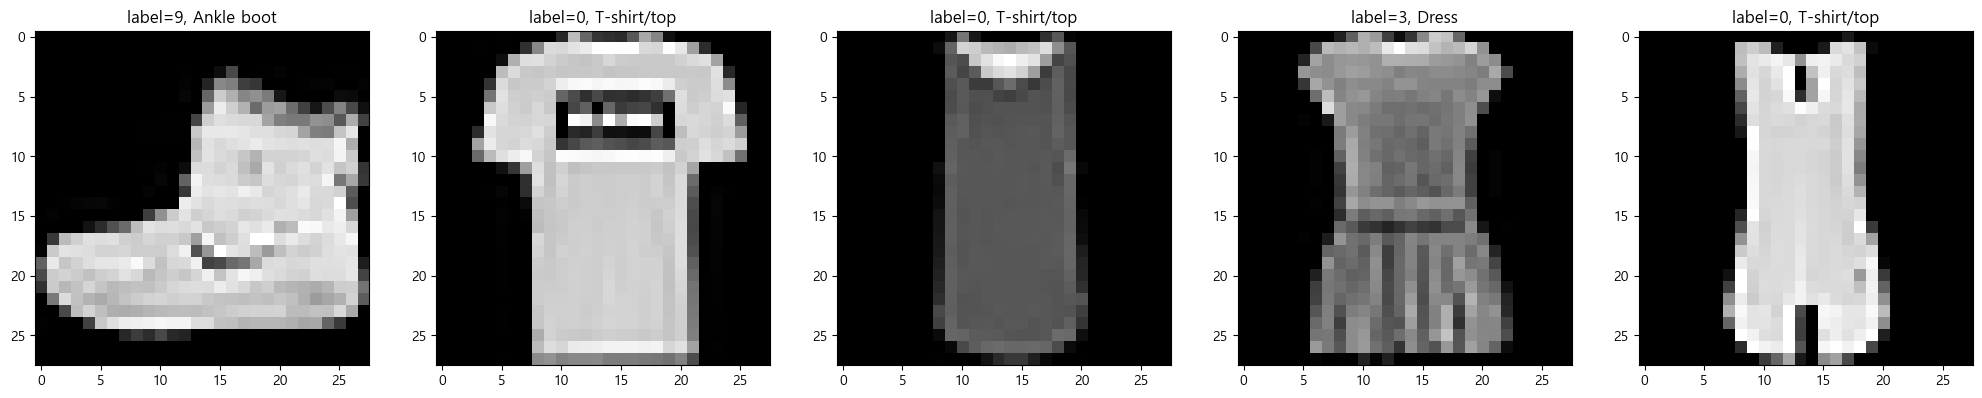

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train, cmap="gray")
    ax[i].set_title("label=%d, %s" % (label, class_names[label]))

## #03. 데이터 전처리

### [1] 종속변수에 대한 one-hot-encoding

훈련/검증 데이터가 이미 구분되어 있으므로 `train_test_split()` 을 적용할 필요는 없다.

종속변수(label)가 각 이미지의 실제 숫자값으로 구성되어 있으므로 `one-hot-encoding` 은 필요하다.

In [7]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### [2] 훈련, 검증용 독립변수(이미지)의 차수 재설정

기본 CNN 골격에 맞게 28x28x1로 차원을 변경

In [8]:
x_train_reshape = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(f"훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_test_reshape.shape}")

훈련 데이터 (60000, 28, 28, 1) / 검증 데이터 (10000, 28, 28, 1)


## #04. 분류 모델 구현

### [1] 모델 적합

{'type': 'conv2d', 'filters': 32, 'kernel_size': (3, 3), 'input_shape': (28, 28, 1), 'activation': 'relu'}
{'type': 'batchnorm', 'activation': 'relu'}
{'type': 'activation', 'function': 'relu', 'activation': 'relu'}
{'type': 'maxpooling', 'pool_size': (2, 2), 'activation': 'relu'}
{'type': 'dropout', 'rate': 0.05, 'activation': 'relu'}
{'type': 'flatten', 'activation': 'relu'}
{'type': 'dense', 'units': 256, 'activation': 'relu'}
{'type': 'batchnorm', 'activation': 'relu'}
{'type': 'activation', 'function': 'relu', 'activation': 'relu'}
{'type': 'dense', 'units': 10, 'activation': 'relu'}
{'type': 'batchnorm', 'activation': 'relu'}
{'type': 'activation', 'function': 'softmax', 'activation': 'relu'}
+-------+----------+----------+
|       |      acc |     loss |
|-------+----------+----------|
| train | 0.937333 | 0.195316 |
| test  |   0.8939 |  0.34524 |
+-------+----------+----------+


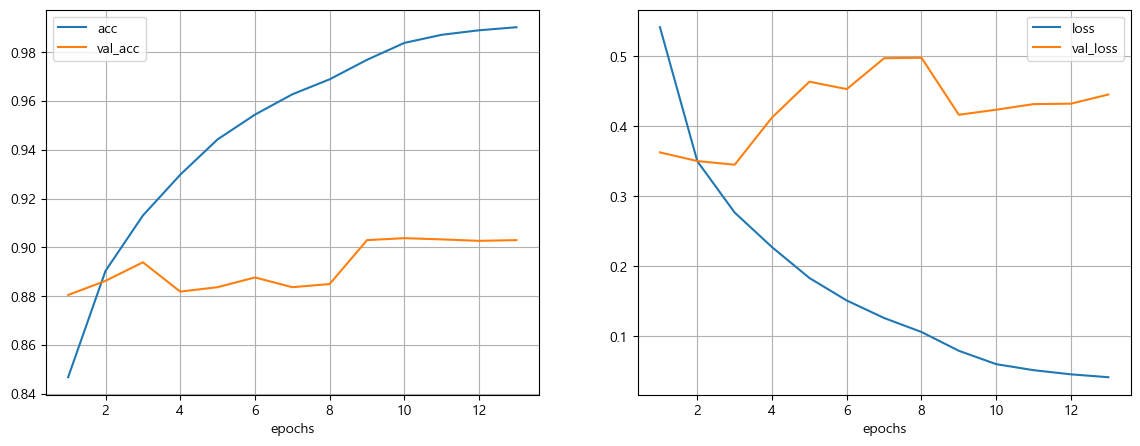

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,853,138 (49.03 MB)

 Trainable params: 6,426,270 (24.51 MB)

 Non-trainable params: 596 (2.33 KB)

 Optimizer params: 6,426,272 (24.51 MB)

In [11]:
model = my_tf(
    x_train=x_train_reshape,
    y_train=y_train_one_hot,
    x_test=x_test_reshape,
    y_test=y_test_one_hot,
    layer=[
        # cnn
        {
            "type": "conv2d",
            "filters": 32,
            "kernel_size": (3, 3),
            "input_shape": (28, 28, 1),
        },
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "maxpooling", "pool_size": (2, 2)},
        {"type": "dropout", "rate": 0.05},
        
        # 단일층
        {"type": "flatten"},
        {"type": "dense", "units": 256},
        {"type": "batchnorm"},
        {"type": "activation", "function": "relu"},
        {"type": "dense", "units": 10},
        {"type": "batchnorm"},
        {"type": "activation", "function": "softmax"},
    ],
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

model.summary()